u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of
	         user id | item id | rating | timestamp.
              The time stamps are unix seconds since 1/1/1970 UTC   

u.info     -- The number of users, items, and ratings in the u data set.

u.item     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

u.genre    -- A list of the genres.

u.user     -- Demographic information about the users; this is a tab
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.

u.occupation -- A list of the occupations.

Citation for dataset

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

### (Colab only) Drive mount

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

### Import Libraries

In [2]:
import numpy as np
import pandas as pd

### Load Dataset

For user-movie rating data:

In [3]:
data_dir = 'dataset/u.data'

df = pd.read_csv(data_dir, sep="\t", header=None)
df.columns=['user_id', 'item_id', 'rating', 'timestamp']
df.drop('timestamp', axis=1, inplace=True)
df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [4]:
df.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


> <pre>
> Analytics:
> * We have 100,0000 data entry that denotes user_id and item_id pair
> * We have 943 unique user (user_id: 1 - 943)
> * We have 1682 unique item (item_id: 1 - 1682)
> </pre>

For user context feature:

In [5]:
user_data_dir = 'dataset/u.user'

user = pd.read_csv(user_data_dir, sep="|", header=None)
user.columns=['user_id', 'age', 'gender', 'occupation','zip code']
user.drop('zip code', axis=1, inplace=True)
user.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [6]:
print(user.describe())
print()
print(user.gender.describe())
print()
print(user.occupation.describe())

          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object


> <pre>
> User Analytics:
>     * The user age ranges from 7-73 years old with average of 34 years old
>     * The gender of the user is only divided into M or F                  (most entry: Male    | 670 / 943 entries)
>     * The occupation of the user is divided into 21 unique groups         (most entry: student | 196 / 943 entries)
> </pre>

In [7]:
movie = pd.read_csv('dataset/u.item', sep='|', header=None, encoding='latin-1')


movie.columns=['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
               'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
               'Sci-Fi', 'Thriller', 'War', 'Western']

movie.drop('release date', axis=1, inplace=True)
movie.drop('video release date', axis=1, inplace=True)
movie.drop('IMDb URL', axis=1, inplace=True)
movie.drop('unknown', axis=1, inplace=True)
movie.drop('movie title', axis=1, inplace=True)

movie.head()

,item_id,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Merging the 2 data to compile all context: 

In [8]:
combined_df = df.merge(user, how='left')
combined_df = combined_df.merge(movie, how='left')
combined_df.head()

,user_id,item_id,rating,age,gender,occupation,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,M,writer,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,39,F,executive,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,25,M,writer,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,28,M,technician,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,47,M,educator,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### One-Hot Encoder

One-hot encoder only applies to categorical feature.

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(combined_df[['gender', 'occupation']])

encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'occupation']))

for col in encoded.columns:
  encoded[col]=encoded[col].astype(int)

encoded.head()

,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Concat the previous data and replace the categorical value with one-hot encode result.

In [10]:
# Add age feature
user_feature = pd.concat([combined_df['age'], encoded], ignore_index=False, sort=False, axis=1)

# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
user_feature['age'] = minmax.fit_transform(user_feature[['age']])

In [11]:
user_movie_feature = pd.concat([user_feature, combined_df.iloc[:,6:]], ignore_index=False, sort=False, axis=1)
user_movie_feature.head()

,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.636364,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.484848,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0.272727,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.318182,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0.606061,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Clustering (Funk Singular Value Decomposition)

Creating pivot table using user_id and item_pair

In [12]:
user_movie_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
user_movie_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Notice how not every entry is filled which will cause incomplete and sparsity in the data, there for we will fill the NaN value using the FSVD method

FSVD method step:
1. Create m*k matrix as the user feature matrix
2. Create k*n matrix as the movie feature matrix

k denotes the factor dimension, we use 10 which is derived from the number of clustering we will apply. Both of these matrices will be filled with a random value that is very small and close to 0.

In [13]:
rows, cols = user_movie_matrix.shape
cluster = 10

user_feature_matrix = np.random.rand(rows, cluster)
print(user_feature_matrix.shape)

movie_feature_matrix = np.random.rand(cluster, cols)
print(movie_feature_matrix.shape)


(943, 10)
(10, 1682)


3. Iterate through the previous pivot table and update the value based on existing data to apply correlations to the nan value

In [14]:
# Hyperparameters for the learning process
learning_rate = 0.01

# Perform matrix factorization using SGD
for user_id_idx in range(rows):
    for item_id_idx in range(cols):
        
        rating = user_movie_matrix.iloc[user_id_idx, item_id_idx]
        
        if not np.isnan(rating):
            # Get the corresponding feature vectors
            user_features = user_feature_matrix[user_id_idx, :]
            movie_features = movie_feature_matrix[:, item_id_idx]

            # Predict the rating
            prediction = np.dot(user_features, movie_features)

            # # Calculate the error
            error = rating - prediction

            # # Update the feature vectors using gradient descent
            user_feature_matrix[user_id_idx, :] += learning_rate * 2 * error * movie_features
            movie_feature_matrix[:, item_id_idx] += learning_rate * 2 * error * user_features

print("\nUpdated user_feature_matrix:")
print(user_feature_matrix)
print("\nUpdated movie_feature_matrix:")
print(movie_feature_matrix)


Updated user_feature_matrix:
[[1.0983536  0.42572248 0.58425367 ... 0.62838149 0.28685491 0.39373791]
 [1.13593521 0.52625018 0.95721132 ... 0.53792176 0.68155778 0.62587332]
 [0.91639296 0.04877367 0.46762709 ... 0.81187283 0.98361068 0.59455254]
 ...
 [0.73204789 0.70256756 0.67054455 ... 0.72875102 0.56056444 0.36798428]
 [1.22592585 0.32753765 0.80859325 ... 0.51050326 0.40449588 0.64543128]
 [0.64861994 0.9255132  0.65456003 ... 0.25735741 0.40216611 0.52241873]]

Updated movie_feature_matrix:
[[0.70765074 1.01029303 0.4403411  ... 0.60800605 0.38460279 0.66346035]
 [1.09157842 1.04055414 0.77109269 ... 0.59971128 0.03759907 0.4623141 ]
 [0.68098009 0.60473823 0.74084334 ... 0.83342852 0.10356672 0.49179053]
 ...
 [0.79384688 0.79324226 0.78312217 ... 0.13678118 0.81366368 0.46329634]
 [0.88437358 0.47390878 0.35908537 ... 0.34290884 0.17524587 0.15364144]
 [0.55562654 0.82288765 0.39143508 ... 0.81239725 0.02374441 0.60663146]]


We have updated the value for both matrices. Now the intution is that we are going to multiply these 2 matrices to get (m x k) x (k x n) = (m x n) matrix.

The (m x n) matrix represents the prediction of ratings from user for each item.

In [15]:
prediction = np.dot(user_feature_matrix, movie_feature_matrix)
pd.DataFrame(prediction).head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,4.430745,4.108379,3.764241,4.064088,4.014317,4.110566,4.666900,4.666723,4.658606,4.407323,...,3.561662,3.655020,3.501652,3.338949,3.091283,2.138217,2.136003,3.797121,2.095144,2.493702
1,5.168880,4.525192,3.972335,4.698187,4.437778,4.657153,5.246629,5.490539,5.453629,5.093144,...,3.807132,3.695542,3.930855,3.977933,3.192920,2.348391,2.398391,4.303347,2.454231,2.669138
2,4.002616,3.816427,3.427594,4.194436,3.509515,3.484878,4.404823,4.743477,4.153169,4.234137,...,2.768368,3.500054,2.842250,2.884001,2.258773,1.554368,1.959342,3.171225,1.787402,2.665641
3,5.666360,5.319163,4.557342,4.932245,5.188952,5.054096,5.599143,5.980477,5.859634,5.515066,...,4.446769,4.085887,4.748081,4.133026,4.081779,2.389837,2.847245,4.817556,2.632254,3.221472
4,3.119843,2.862335,2.720616,2.723090,2.715976,2.275414,3.021784,3.244314,3.227102,2.798862,...,2.152607,2.221841,2.561494,2.341188,2.009214,1.620220,1.508252,2.533920,1.277612,1.815712


In [16]:
# Method 1: Clipping
# prediction = np.clip(prediction, 0, 5)

# Method 2: Scaling with MinMax
prediction_min = prediction.min(axis=1, keepdims=True)
prediction_max = prediction.max(axis=1, keepdims=True)

normalized_prediction = (prediction - prediction_min) / (prediction_max - prediction_min + 1e-8)

# Scale from 0-5
# scaled_prediction = normalized_prediction * 5
# scale to 1-5
scaled_prediction = normalized_prediction * 4 + 1

# Rounding to nearest int
# np.round(scaled_prediction)

prediction_df = pd.DataFrame(scaled_prediction)
prediction_df.head()

print(f'New data ranges from {np.round(scaled_prediction.min())} - {np.round(scaled_prediction.max())}')

New data ranges from 1.0 - 5.0


before scaling

In [17]:
pd.DataFrame(prediction).describe()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,4.449150,3.959892,3.694634,4.100414,3.946205,3.831829,4.493599,4.817924,4.734690,4.432098,...,3.307031,3.291414,3.410413,3.284017,3.003008,2.107096,2.146652,3.669583,1.914910,2.413808
std,0.677771,0.629264,0.576522,0.629915,0.628154,0.631047,0.688821,0.735331,0.730339,0.684131,...,0.541199,0.555042,0.559551,0.542388,0.512365,0.404135,0.344491,0.583001,0.365346,0.408719
min,1.478490,1.351633,1.261788,1.297642,1.217412,1.179388,1.477265,1.691954,1.534716,1.472323,...,1.045304,0.985761,1.322780,1.020465,0.935594,0.391276,0.788186,1.186843,0.577971,0.765154
25%,4.031053,3.571281,3.316559,3.695366,3.544069,3.448933,4.041610,4.352398,4.280176,3.989451,...,2.957721,2.930268,3.079458,2.952875,2.675378,1.845649,1.927186,3.312342,1.686276,2.173366
50%,4.456096,4.001539,3.711511,4.095012,3.937582,3.820058,4.465853,4.839188,4.741262,4.449922,...,3.340954,3.303888,3.419403,3.273528,3.008888,2.120516,2.149971,3.694159,1.896906,2.429446
75%,4.889493,4.369549,4.055688,4.517029,4.345427,4.223924,4.942036,5.312188,5.196589,4.868849,...,3.623027,3.642598,3.752343,3.641377,3.317563,2.376047,2.363677,4.040390,2.145239,2.675448
max,6.610935,6.122504,5.474604,6.110155,6.107915,5.801273,6.676311,7.183987,6.990600,6.532441,...,5.032026,5.051923,5.250935,5.021495,4.631235,3.432455,3.379417,5.621735,3.244506,3.738487


After scaling

In [18]:
prediction_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,3.908896,3.422413,3.161349,3.563772,3.411362,3.297296,3.954214,4.273526,4.192946,3.891514,...,2.777849,2.762356,2.878586,2.753613,2.475661,1.587559,1.624216,3.136994,1.396985,1.889190
std,0.148397,0.207653,0.155987,0.170199,0.245864,0.277824,0.205945,0.172674,0.198176,0.175238,...,0.229760,0.270711,0.258263,0.266618,0.242329,0.269003,0.163912,0.202330,0.278034,0.205467
min,3.368184,2.797320,2.585777,3.088360,2.677165,2.448098,3.310518,3.583625,3.517892,3.338783,...,2.053806,1.960053,2.077644,1.937281,1.835694,1.000000,1.211988,2.476358,1.000000,1.280979
25%,3.810456,3.279513,3.054011,3.443471,3.240836,3.116868,3.811898,4.162484,4.067010,3.776311,...,2.619946,2.578652,2.700909,2.561828,2.318077,1.403894,1.507834,3.004493,1.178832,1.742896
50%,3.913065,3.428192,3.154505,3.563857,3.412102,3.307830,3.948249,4.281432,4.197206,3.902976,...,2.777502,2.752236,2.863433,2.766147,2.475682,1.575701,1.614923,3.129967,1.384047,1.873828
75%,4.006546,3.571299,3.263627,3.681943,3.583105,3.487978,4.103242,4.388763,4.321887,4.018087,...,2.933857,2.955673,3.046269,2.936874,2.616298,1.758525,1.727982,3.276760,1.582635,2.028502
max,4.310213,4.028494,3.733817,4.059708,4.296684,4.078498,4.550778,4.764900,4.787766,4.333296,...,3.405884,3.661818,3.655985,3.860941,3.428041,2.663231,2.295259,3.742369,2.485452,2.613101


Some of the prediction have value above 5 which doesn't make any sense. But this is normal as we initialized the matrices with randomized value. We have the option to use non linear activations like softmax to scale it to 0-5. Or another approach is to clip the items with ratings above 5 to keep it at 5.

### Cluster the user-movie pairs into 10 different clusters

Having all the projected user preference about the item, we can cluster the users into 10 big clusters.

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=5)
user_clusters = kmeans.fit_predict(prediction_df)

#user_feature['user_cluster'] = user_clusters

print(user_clusters)
print(user_clusters.shape)

[9 6 8 3 4 8 9 5 8 2 7 8 9 8 3 2 9 1 2 0 8 5 5 2 8 0 3 1 0 4 1 8 4 9 7 8 8
 1 4 5 6 4 1 3 5 7 8 8 7 4 5 0 3 5 1 8 1 9 8 4 8 3 7 9 8 7 7 3 5 4 1 7 0 0
 2 7 0 3 6 7 1 0 6 3 1 9 6 0 2 9 4 1 1 4 0 7 2 7 1 9 4 2 1 5 3 8 0 6 3 8 5
 5 1 7 9 1 1 7 0 0 8 7 1 0 6 8 6 1 7 0 7 7 6 1 7 7 0 0 7 1 0 6 3 9 4 1 1 4
 1 7 8 7 3 7 0 9 4 5 7 0 1 3 7 9 4 7 0 6 2 4 4 3 3 1 7 5 4 1 2 1 4 4 6 4 1
 1 4 1 8 2 0 3 2 4 1 0 7 6 4 3 7 1 2 6 7 6 9 4 4 0 0 9 1 9 8 2 4 7 9 1 7 1
 1 5 1 4 7 2 3 4 5 6 1 5 7 5 0 4 1 3 2 4 1 3 3 3 9 1 0 1 2 3 7 8 8 6 6 3 3
 6 2 2 4 2 3 3 1 6 7 8 6 1 6 7 9 2 1 9 1 1 9 2 3 6 6 8 3 4 7 2 6 3 4 0 1 7
 2 3 8 0 7 3 4 8 4 5 8 8 0 7 8 4 2 2 1 6 6 9 2 7 7 9 7 9 1 0 7 4 9 9 5 8 3
 9 3 9 8 7 9 8 6 9 7 1 6 8 4 6 2 5 2 3 5 0 9 8 8 2 4 8 4 5 1 5 5 3 6 4 4 4
 2 6 1 5 4 8 5 5 8 1 7 1 0 4 3 5 9 7 5 5 8 7 4 7 4 8 4 8 1 4 9 4 1 6 2 2 4
 4 7 3 4 3 5 8 9 5 8 6 5 9 6 7 2 7 7 1 6 4 4 1 2 1 4 6 4 2 4 2 6 1 0 7 2 6
 5 6 9 6 4 4 7 5 8 3 7 4 6 4 1 2 8 7 1 8 8 9 5 7 1 2 8 2 6 2 7 6 9 2 1 1 3
 9 2 4 9 5 8 6 9 6 9 3 8 

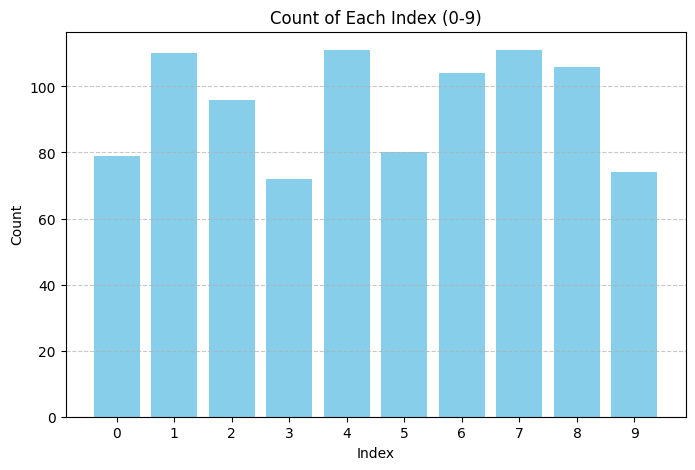

In [20]:
import matplotlib.pyplot as plt
count = np.bincount(user_clusters, minlength=10)
labels = np.arange(10)

plt.figure(figsize=(8,5))
plt.bar(labels, count, color='skyblue')
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Count of Each Index (0-9)')
plt.xticks(labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
pd.DataFrame(user_clusters).describe()

,0
count,943.000000
mean,4.535525
std,2.818004
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,9.000000


In [22]:
combined_df

,user_id,item_id,rating,age,gender,occupation,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,M,writer,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,39,F,executive,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,25,M,writer,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,28,M,technician,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,47,M,educator,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,13,M,student,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,36,F,administrator,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99997,276,1090,1,21,M,student,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99998,13,225,2,47,M,educator,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
user_id_to_cluster = {user_id: cluster for user_id, cluster in zip(range(1, 944), user_clusters)}
combined_df['user_id'] = combined_df['user_id'].map(user_id_to_cluster)
combined_df

,user_id,item_id,rating,age,gender,occupation,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,242,3,49,M,writer,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,302,3,39,F,executive,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,5,377,1,25,M,writer,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,51,2,28,M,technician,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,7,346,1,47,M,educator,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,8,476,3,13,M,student,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,3,204,5,36,F,administrator,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99997,2,1090,1,21,M,student,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99998,9,225,2,47,M,educator,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### LinUCB Model

In [25]:
# Implementation assisted by ChatGPT

import numpy as np

class LinUCB:
  def __init__(self, n_arms, context_dim, alpha):
    self.n_arms = n_arms
    self.context_dim = context_dim
    self.alpha = alpha
    self.A = [np.identity(context_dim) for arm in range(n_arms)]
    self.b = [np.zeros(context_dim) for arm in range(n_arms)]

  def score(self, arm, x):
        A_inv = np.linalg.inv(self.A[arm])
        theta = A_inv @ self.b[arm]
        score = np.transpose(theta) @ x + self.alpha * np.sqrt(np.transpose(x) @ A_inv @ x)
        return score

  def select_arm(self, x):
    p_vals = []
    for i in range(self.n_arms):
        p = self.score(i, x)
        p_vals.append(p)
    return np.argmax(p_vals)

  def update(self, arm_idx, x, r):
    self.A[arm_idx] += np.outer(x, x)
    self.b[arm_idx] += r * x

In [ ]:
# Put debug code here to test LinUCB

In [26]:
n_training = int(combined_df.shape[0]*0.9)

training_df = combined_df.iloc[:n_training]
testing_df = combined_df.iloc[n_training:]

In [27]:
training_df.columns

Index(['user_id', 'item_id', 'rating', 'age', 'gender', 'occupation', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [28]:
num_clusters = 10
context_dim = user_movie_feature.shape[1]
linucb = LinUCB(num_clusters, context_dim, 2)

for idx, row in training_df.iterrows():
  user_id = row['user_id']
  context = user_movie_feature.iloc[idx]
  reward = row['rating']
  std_reward = reward/5

  user_cluster = user_clusters[user_id-1]

  linucb.update(user_cluster, context, std_reward)

In [29]:
# Implementation assisted by ChatGPT

def ndcg(relevance_scores):

    dcg = np.sum((2**relevance_scores - 1) / np.log2(np.arange(2, relevance_scores.size + 2)))

    ideal_relevance = np.array(sorted(relevance_scores, reverse=True))
    idcg = np.sum((2**ideal_relevance - 1) / np.log2(np.arange(2, ideal_relevance.size + 2)))

    ndcg = dcg / idcg

    return ndcg

In [30]:
test_rewards = []
cumulative_test_reward = 0
test_arm_selection = []

for idx, row in testing_df.iterrows():
  print(row.shape)
  context = user_feature.iloc[idx]
  print(f'context: {context.shape}')
  reward = row['rating']
  std_reward = reward/5

  #chosen_arm = linucb.select_arm(context)
  #test_arm_selection.append(chosen_arm)

  #cumulative_test_reward += std_reward
  #test_rewards.append(std_reward)

  break

#ndcg(np.array(test_rewards))

(24,)
context: (24,)


In [31]:
def dcg(relevances):
    return sum([(2**rel - 1) / np.log2(idx + 2) for idx, rel in enumerate(relevances)])

def ndcg_at_k(true_relevance, predicted_scores, k=10):
    idx_sorted = np.argsort(predicted_scores)[::-1][:k]
    relevances = [true_relevance[i] for i in idx_sorted]
    ideal_relevances = sorted(true_relevance, reverse=True)[:k]
    return dcg(relevances) / dcg(ideal_relevances) if dcg(ideal_relevances) > 0 else 0

In [32]:
# from tqdm import tqdm

# ndcg_scores = []

# for idx, row in tqdm(testing_df.iterrows(), total=len(testing_df), desc="Calculating NDCG"):
#     user_id = row['user_id']
#     true_movie = row['item_id']
#     true_rating = row['rating']

#     # Only user features
#     user_vec = user_feature.iloc[idx]

#     predicted_score = []
#     true_relevance = []

#     for idx2, movie_row in movie.iterrows():
#       movie_vec = movie_row.drop('item_id')
#       context = np.concatenate([user_vec, movie_vec])
#     #   print(context.shape)
#       arm = linucb.select_arm(context)

#       score = linucb.score(arm,context)
#       predicted_score.append(score)

#       if movie_row['item_id'] == true_movie:
#           true_relevance.append(true_rating)
#       else:
#           true_relevance.append(0)

#     ndcg = ndcg_at_k(true_relevance, predicted_score, k=10)
#     ndcg_scores.append(ndcg)

# print(f"Average NDCG@10: {np.mean(ndcg_scores):.4f}")

In [33]:
# from tqdm import tqdm

# ndcg_scores = []

# # Use itertuples() for faster iteration
# for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="Calculating NDCG"):
#     user_id = row.user_id
#     true_movie = row.item_id
#     true_rating = row.rating

#     # Only user features
#     user_vec = user_feature.loc[testing_df.index[0]].values  # safer way for iloc if index shifted

#     predicted_score = []
#     true_relevance = []

#     for movie_row in movie.itertuples(index=False):
#         movie_vec = np.array(movie_row[1:])  # skip item_id (position 0)
#         context = np.concatenate([user_vec, movie_vec])

#         arm = linucb.select_arm(context)
#         score = linucb.score(arm, context)
#         predicted_score.append(score)

#         if movie_row.item_id == true_movie:
#             true_relevance.append(true_rating)
#         else:
#             true_relevance.append(0)

#     ndcg = ndcg_at_k(true_relevance, predicted_score, k=10)
#     ndcg_scores.append(ndcg)

# print(f"Average NDCG@10: {np.mean(ndcg_scores):.4f}")


In [34]:
from tqdm import tqdm
from joblib import Parallel, delayed
import numpy as np

def calculate_ndcg(row):
    user_id = row.user_id
    true_movie = row.item_id
    true_rating = row.rating

    user_vec = user_feature.loc[testing_df.index[0]].values

    predicted_score = []
    true_relevance = []

    for movie_row in movie.itertuples(index=False):
        movie_vec = np.array(movie_row[1:])  # Skip item_id
        context = np.concatenate([user_vec, movie_vec])

        arm = linucb.select_arm(context)
        score = linucb.score(arm, context)
        predicted_score.append(score)

        if movie_row.item_id == true_movie:
            true_relevance.append(true_rating)
        else:
            true_relevance.append(0)

    ndcg = ndcg_at_k(true_relevance, predicted_score, k=10)
    return ndcg


# Parallel execution with progress bar
results = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="Parallel NDCG"))

print(f"Average NDCG@10: {np.mean(results):.4f}")


Parallel NDCG:   0%|          | 0/10000 [00:00<?, ?it/s]

Parallel NDCG: 100%|██████████| 10000/10000 [22:24<00:00,  7.44it/s]


Average NDCG@10: 0.0083
